In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [38]:
df.isnull().count()

MODELYEAR                   1067
MAKE                        1067
MODEL                       1067
VEHICLECLASS                1067
ENGINESIZE                  1067
CYLINDERS                   1067
TRANSMISSION                1067
FUELTYPE                    1067
FUELCONSUMPTION_CITY        1067
FUELCONSUMPTION_HWY         1067
FUELCONSUMPTION_COMB        1067
FUELCONSUMPTION_COMB_MPG    1067
CO2EMISSIONS                1067
dtype: int64

# **Simple Linear Regression**

In [39]:
X = df['ENGINESIZE']
y = df['CO2EMISSIONS']

In [40]:
X

0       2.0
1       2.4
2       1.5
3       3.5
4       3.5
       ... 
1062    3.0
1063    3.2
1064    3.0
1065    3.2
1066    3.2
Name: ENGINESIZE, Length: 1067, dtype: float64

In [41]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
X_train

520    2.0
54     4.0
633    6.5
725    3.5
101    3.0
      ... 
545    5.0
524    1.6
995    3.5
271    1.4
110    4.4
Name: ENGINESIZE, Length: 853, dtype: float64

In [45]:
y_train

520    242
54     290
633    421
725    224
101    232
      ... 
545    334
524    202
995    285
271    193
110    292
Name: CO2EMISSIONS, Length: 853, dtype: int64

In [46]:
X_train = X_train.values.reshape(-1,1)
X_train.shape

(853, 1)

In [47]:
y_train = y_train.values.reshape(-1,1)
y_train.shape

(853, 1)

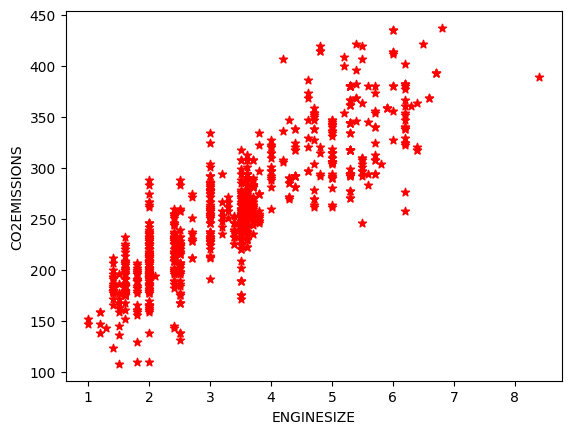

In [48]:
plt.scatter(X_train, y_train, color='red', marker='*')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
lr.predict([[1.5]])

array([[184.13705749]])

In [53]:
predicted_test_data = lr.predict(X_test.values.reshape(-1,1))
predicted_test_data

array([[222.90776604],
       [346.97403338],
       [265.55554543],
       [296.57211227],
       [269.43261629],
       [358.60524594],
       [195.76827005],
       [366.35938765],
       [308.20332483],
       [296.57211227],
       [257.80140373],
       [269.43261629],
       [261.67847458],
       [281.06382885],
       [319.8345374 ],
       [188.01412834],
       [319.8345374 ],
       [346.97403338],
       [261.67847458],
       [261.67847458],
       [203.52241176],
       [203.52241176],
       [242.29312031],
       [265.55554543],
       [265.55554543],
       [296.57211227],
       [261.67847458],
       [195.76827005],
       [312.08039569],
       [219.03069518],
       [242.29312031],
       [339.21989167],
       [319.8345374 ],
       [358.60524594],
       [230.66190774],
       [203.52241176],
       [222.90776604],
       [265.55554543],
       [451.65494645],
       [222.90776604],
       [203.52241176],
       [180.25998664],
       [261.67847458],
       [327

In [54]:
predicted_train_data = lr.predict(X_train)
predicted_train_data

array([[203.52241176],
       [281.06382885],
       [377.99060021],
       [261.67847458],
       [242.29312031],
       [296.57211227],
       [335.34282081],
       [207.39948262],
       [222.90776604],
       [269.43261629],
       [203.52241176],
       [219.03069518],
       [184.13705749],
       [319.8345374 ],
       [195.76827005],
       [265.55554543],
       [319.8345374 ],
       [257.80140373],
       [308.20332483],
       [304.32625398],
       [222.90776604],
       [265.55554543],
       [203.52241176],
       [281.06382885],
       [296.57211227],
       [222.90776604],
       [203.52241176],
       [203.52241176],
       [219.03069518],
       [242.29312031],
       [265.55554543],
       [261.67847458],
       [222.90776604],
       [242.29312031],
       [188.01412834],
       [265.55554543],
       [273.30968714],
       [366.35938765],
       [269.43261629],
       [265.55554543],
       [180.25998664],
       [203.52241176],
       [188.01412834],
       [269

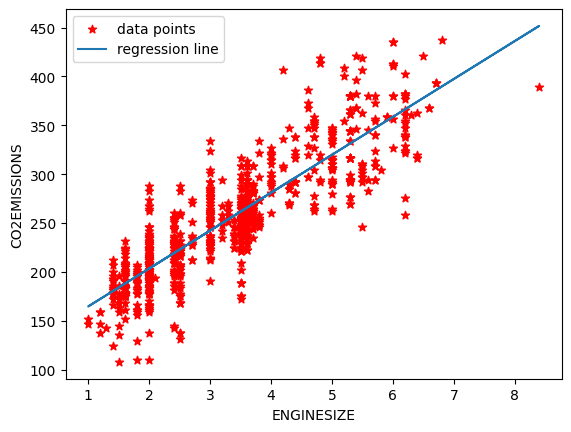

In [55]:
plt.scatter(X_train, y_train, color='red', marker='*', label='data points')
plt.plot(X_train, predicted_train_data, label='regression line')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

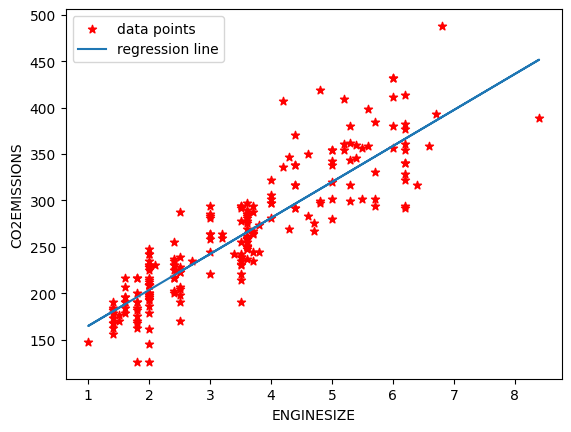

In [56]:
plt.scatter(X_test, y_test, color='red', marker='*', label='data points')
plt.plot(X_test, predicted_test_data, label='regression line')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.legend()
plt.show()

In [57]:
lr.coef_

array([[38.77070854]])

In [58]:
lr.intercept_

array([125.98099467])

In [59]:
from sklearn import metrics

In [60]:
metrics.mean_absolute_error(y_test, predicted_test_data)

23.950022903062663

In [61]:
metrics.mean_squared_error(y_test, predicted_test_data)

995.4285722151621

In [62]:
np.sqrt(metrics.mean_squared_error(y_test, predicted_test_data))

31.55041318612424

In [63]:
metrics.r2_score(y_test, predicted_test_data)

0.789475651291442

# **Multiple Linear Regression**

In [64]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [89]:
X = df[['ENGINESIZE', 'CYLINDERS']]
X.head()

,ENGINESIZE,CYLINDERS
0,2.0,4
1,2.4,4
2,1.5,4
3,3.5,6
4,3.5,6


In [90]:
y = df['CO2EMISSIONS']
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [94]:
lr2 = LinearRegression()

In [95]:
lr2.fit(X_train, y_train)

LinearRegression()

In [96]:
train_pred = lr2.predict(X_train)
train_pred

array([265.08649483, 356.33607927, 190.48338361, 248.44002161,
       265.08649483, 253.98884601, 248.44002161, 212.67868124,
       408.43787458, 336.91519384, 201.58103242, 331.36636943,
       248.44002161, 262.31208262, 196.03220802, 350.78725486,
       212.67868124, 336.91519384, 356.33607927, 336.91519384,
       212.67868124, 248.44002161, 215.45309344, 190.48338361,
       262.31208262, 190.48338361, 201.58103242, 248.44002161,
       201.58103242, 389.01698915, 267.86090703, 201.58103242,
       356.33607927, 201.58103242, 212.67868124, 265.08649483,
       262.31208262, 331.36636943, 317.49430842, 190.48338361,
       262.31208262, 311.94548401, 397.34022576, 259.53767042,
       284.50738025, 356.33607927, 284.50738025, 314.71989621,
       248.44002161, 169.82830122, 201.58103242, 408.43787458,
       201.58103242, 248.44002161, 196.03220802, 201.58103242,
       201.58103242, 265.08649483, 306.3966596 , 265.08649483,
       212.67868124, 201.58103242, 215.45309344, 331.36

In [100]:
test_pred = lr2.predict(X_test)
test_pred

array([201.58103242, 262.31208262, 356.33607927, 265.08649483,
       276.18414364, 259.53767042, 196.03220802, 262.31208262,
       331.36636943, 331.36636943, 265.08649483, 190.48338361,
       262.31208262, 212.67868124, 323.04313282, 212.67868124,
       184.9345592 , 262.31208262, 323.04313282, 187.70897141,
       331.36636943, 201.58103242, 270.63531923, 331.36636943,
       284.50738025, 389.01698915, 323.04313282, 317.49430842,
       201.58103242, 212.67868124, 336.91519384, 190.48338361,
       267.86090703, 201.58103242, 265.08649483, 190.48338361,
       248.44002161, 262.31208262, 248.44002161, 339.68960604,
       190.48338361, 201.58103242, 248.44002161, 212.67868124,
       212.67868124, 331.36636943, 339.68960604, 323.04313282,
       256.76325822, 187.70897141, 356.33607927, 190.48338361,
       212.67868124, 184.9345592 , 187.70897141, 331.36636943,
       259.53767042, 306.3966596 , 265.08649483, 201.58103242,
       265.08649483, 306.3966596 , 225.01052702, 306.39

In [105]:
lr2.coef_

array([27.74412203,  9.55743357])

In [106]:
lr2.intercept_

107.86305405878034

In [102]:
metrics.mean_absolute_error(y_test, test_pred)

22.264692977539088

In [103]:
metrics.mean_squared_error(y_test, test_pred)

885.6967427882471

In [104]:
np.sqrt(metrics.mean_squared_error(y_test, test_pred))

29.760657633665407